<a href="https://colab.research.google.com/github/prbsh9/Suspicious-Activity-Detection-from-videos/blob/master/suspiciousDetectionFastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We try Resnet34 here! Lets hope for the best!

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
from google.colab import drive
drive.mount('/drive')
import os
path = '/drive/My Drive/suspicious_activity/content/frameLocally'
os.chdir(path)
os.getcwd()

In [0]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct= 0.2, ds_tfms = get_transforms(), size = 224, num_workers = 4
                                  ).normalize(imagenet_stats)



In [0]:
os.chdir('..')

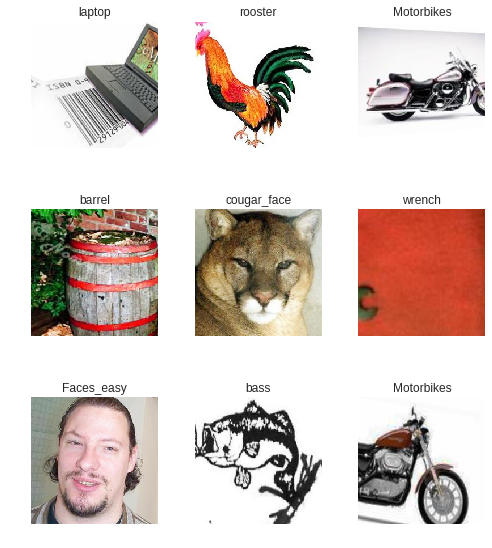

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
 data.c, len(data.train_ds), len(data.valid_ds)

(101, 6942, 1735)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 83851600.53it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.919127,0.545293,0.136599,01:53
1,0.631626,0.277899,0.080115,01:53
2,0.343088,0.213129,0.066859,01:51
3,0.225554,0.189303,0.056484,01:51


**OK We have our error rate 5%. Lets see if we can do any progress by looking at the leraning rate map when we plot and unfreezing it!**

In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Faces_easy', 'Faces', 8),
 ('Faces', 'Faces_easy', 7),
 ('water_lilly', 'lotus', 6),
 ('ketch', 'schooner', 4),
 ('helicopter', 'airplanes', 3),
 ('lobster', 'crayfish', 3),
 ('schooner', 'ketch', 3),
 ('crayfish', 'lobster', 2),
 ('crocodile', 'crocodile_head', 2),
 ('lotus', 'water_lilly', 2)]

*See! Crocodile and crocodile head! 
water_lilly and lotus.. Its kind of common to get confused in these!*

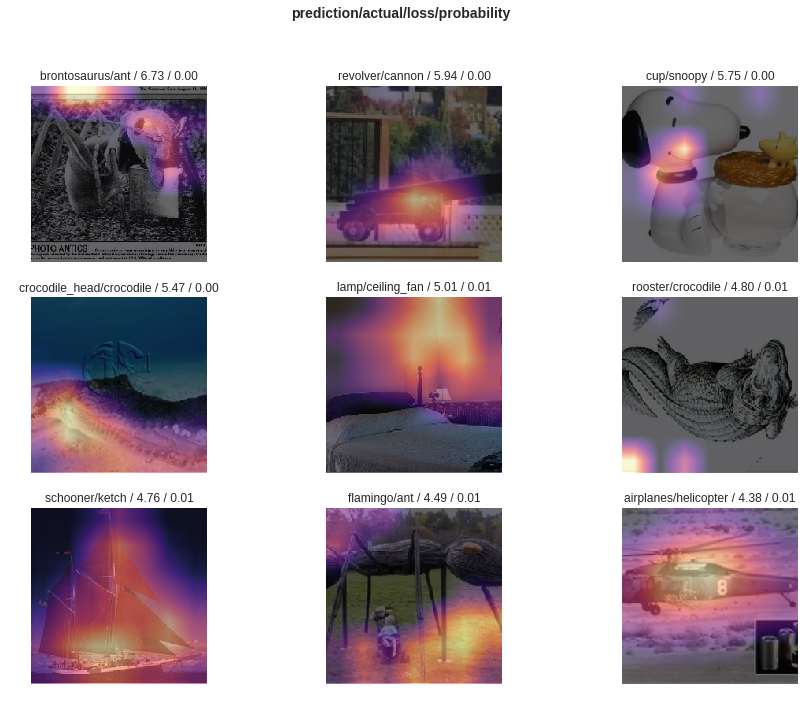

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


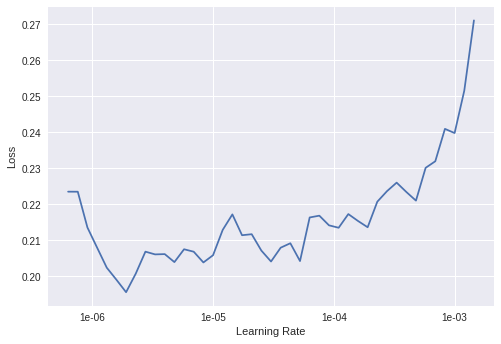

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.018424,0.164359,0.040922,01:55


**We Improved our performance.. So far so great..**<br> <br>
*I guess it can be done more better by tuning the learning rate more! I dont think its tuned the best!* <br>
Thats for you LOL

In [0]:
learn.save('stage-2')